## 1. 

#### import the JSON file using Pandas. View the last 5 rows of the DataFrame.

In [1]:
import pandas as pd

df = pd.read_json("asset_data_analysis.json", orient= "split")
df.tail()

,date,products,sales,costs
3,2021-11-07,cars,15900,10910
4,2021-12-06,boats,12087,7087
5,2021-12-09,cars,56897,40447
6,2021-11-10,cars,11879,5879
7,2021-12-06,houses,19345,13451


## 2. 

#### Using pandas, create a copy of the DataFrame and convert the date column into a pandas datetime format. Set the date as the index of the DataFrame. The date column should not be deleted when it is set as an index.

In [2]:
# Creating a copy of the DataFrame
df_copy = df.copy()

# Setting date as index
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy = df.set_index('date', drop=False)
df_copy.head()

,date,products,sales,costs
date,,,,
2021-11-20,2021-11-20,cars,19234,12340
2021-12-12,2021-12-12,boats,87598,67568
2021-12-06,2021-12-06,houses,20989,11999
2021-11-07,2021-11-07,cars,15900,10910
2021-12-06,2021-12-06,boats,12087,7087


## 3. 

#### Using Matplotlib, create a line trend plot of sales and date.

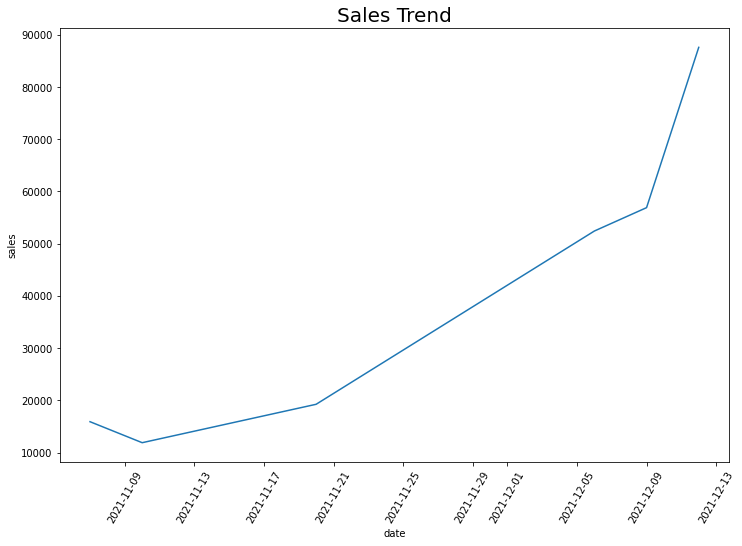

In [3]:
import matplotlib.pyplot as plt

# Grouping by the index(date)
df_grouped = df_copy.groupby(df_copy.index).sum(numeric_only=True)

plt.figure(figsize=(12, 8))
plt.plot(df_grouped.index, df_grouped.sales)
plt.xlabel('date')
plt.xticks(rotation = 60)
plt.ylabel('sales')
plt.title("Sales Trend", fontsize=20)
plt.show()

## 4. 

#### Using the original DataFrame (question 1), write another code to set a hierarchical index, with the date column as the outer index and the products column as the inner index. Save this to a new variable.

In [4]:
# Setting hierarchical index
df2 = df.set_index(['date', "products"])
df2

,,sales,costs
date,products,,
2021-11-20,cars,19234,12340
2021-12-12,boats,87598,67568
2021-12-06,houses,20989,11999
2021-11-07,cars,15900,10910
2021-12-06,boats,12087,7087
2021-12-09,cars,56897,40447
2021-11-10,cars,11879,5879
2021-12-06,houses,19345,13451


## 5. 

#### One of the benefits of setting a multiIndexing is that it makes it easy to filter data. Using the hierarchical index you set in question 4, calculate the profit of "Houses" on the 12 -o6- 2021.

In [5]:
# Using multi-indexing to filter sales
sales_on_12 = df2.loc[( ["12-6-2021"], "houses"), "sales"].sum()

# Using multi-indexing to filter costs
costs_on_12 = df2.loc[( ["12-6-2021"], "houses"), "costs"].sum()

# Calculating the difference between costs and sales
profit_on_12 = sales_on_12 - costs_on_12
print('Profit on houses on the 12th of June is ', profit_on_12)

Profit on houses on the 12th of June is  14884


## 6

#### Use the apply() function to apply a thousand separator to the sales and cost column.

In [6]:
def thousand_separator(df, sales, costs):
    df[sales] = df[sales].apply(lambda x: '{:,}'.format(x))
    df[costs] = df[costs].apply(lambda x: '{:,}'.format(x))
    return df2

thousand_separator(df2, "sales", "costs")

,,sales,costs
date,products,,
2021-11-20,cars,"19,234","12,340"
2021-12-12,boats,"87,598","67,568"
2021-12-06,houses,"20,989","11,999"
2021-11-07,cars,"15,900","10,910"
2021-12-06,boats,"12,087","7,087"
2021-12-09,cars,"56,897","40,447"
2021-11-10,cars,"11,879","5,879"
2021-12-06,houses,"19,345","13,451"


In [7]:
df3 = df2.groupby(['products']).size().sort_values(ascending=False)
df3

products
cars      4
boats     2
houses    2
dtype: int64

In [8]:
# Returning the product that appears the most
df3.index[0], df3[0]

('cars', 4)